# Lab for module 2 lesson 5

Topics covered
- Converting dates to the date type
- Extracting information such as month and year from dates

**Problem Statement & Data Description**

*Client: ABC Retail, Incorporated, rest-of-the-world division* 

***Project name: Online retail sales analysis*** 

An online retailer, ABC, Inc., operates in nearly 100 countries worldwide, selling furniture, office supplies and technology products to customers in three segments: consumer, corporate and home office. ABC, Inc. is a US-based company, and it has two major divisions: US and rest of the world. We are working with the rest of the world division of the company. 

They have provided us with online sales transaction data from 2011 to 2014.

We are given 3 datasets:-

1. Data on each sale; 51290 records; all data in US dollars
It contains fields like
**order_id** (identifier) ,order_date ,ship_date ,ship_mode ,**customer_id**(identifier) ,product_id ,category ,sub_category ,product_name ,sales ,quantity ,discount ,profit ,shipping_cost ,order_priority ,**vendor_code** (identifier) 


2. Data on the customers; 1590 records 
It contains fields like
**customer_id** (identifier) ,customer_name ,city ,state ,country ,postal_code ,segment ,market ,region 

3. Data on vendors who supply the retailer; 65 records 
It contains fields like
vendor ,**vendor_code** (identifier) 

We need to analyze the data and need to provide answer to different questions asked by company officials.

### Read the retail sales data from sales_data.csv

In [1]:
# reading the data
import matplotlib.pyplot as plt
import pandas as pd
import warnings
# Use the warning filter context manager to temporarily suppress warnings
warnings.filterwarnings("ignore")

sales = pd.read_csv('sales_data.csv')

In [2]:
sales.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,vendor_code
0,1,MX-2014-143658,02/10/2014,06/10/2014,Standard Class,SC-20575,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,VE_001
1,2,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,VE_002
2,3,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium,VE_003
3,4,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium,VE_004
4,5,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium,VE_005


### Q1. What is the data type of the *order_date* column? Convert it into the date type
**Hint:** you might find the function `pd.datetime()` useful here

In [3]:
# write your code here

### Q2. What are the different unique years covered by this data set?

**Hint:** you might find the function `dt.year()` useful here

In [4]:
# write your code here

### Q3. Which month of the year had the highest sales for the category 'Furntiure' across the entire data set?

**Hint:** try the function `dt.month()`

In [5]:
# write your code here

### Q4. Which time of week (weekdays vs weekends) had highest total sales across the entire data set?

Treat Monday - Friday as weekdays, and Saturday and Sunday as weekends

**Hint:** try the function `dt.weekday()`.

In [6]:
# write your code here

### Q5. Which is the most profitable month overall? And which is the least?

Remember, we are now looking at profit, and not sales

In [7]:
# write your code here

## Solutions

In [8]:
# Q1 - convert date to the correct format
sales[['order_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_date  51290 non-null  object
dtypes: object(1)
memory usage: 400.8+ KB


In [9]:
# Continuing Q1 - convert date to the correct format
sales['order_date']=pd.to_datetime(sales['order_date'],format='%d/%m/%Y')
sales['order_date'].head()

0   2014-10-02
1   2012-10-15
2   2012-10-15
3   2012-10-15
4   2012-10-15
Name: order_date, dtype: datetime64[ns]

In [10]:
# Q2 - different years in the data set
sales['order_date'].dt.year.unique()

array([2014, 2012, 2013, 2011])

In [11]:
# Q3 - month with highest sales for 'Furniture'
sales['order_month']=sales['order_date'].dt.strftime('%b')
Furniture_data=sales[sales['category']=='Furniture']
Furniture_data.groupby('order_month')['sales'].sum().sort_values(ascending=False).head(1)

order_month
Dec    538920.8486
Name: sales, dtype: float64

In [12]:
print(pd.to_datetime('2014-09-29').strftime("%A"))
print(pd.to_datetime('2014-09-29').weekday())

Monday
0


In [13]:
# Q4 - weekends vs weekdays - comparison of total sales
sales['weekday']=sales['order_date'].dt.weekday # 0 is Monday , (5,6) are saturday & Sunday.
sales['weekend']=sales['weekday'].apply(lambda x:(x==5)|(x==6)).astype(int)
sales.groupby('weekend')['sales'].sum()

weekend
0    1.124223e+07
1    1.400268e+06
Name: sales, dtype: float64

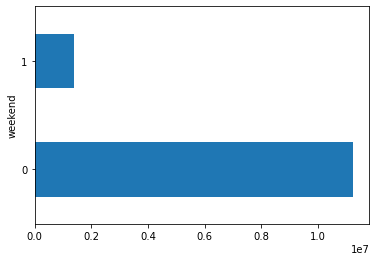

In [14]:
### Grouping by wrto weekend 
sales.groupby('weekend')['sales'].sum().plot(kind='barh')

#### Profit on weeknds is lower than weekdays.

In [15]:
# Q5 - most profitable profitable months
sales.groupby('order_month')['profit'].sum().sort_values(ascending=False).head(1)

order_month
Nov    175449.48412
Name: profit, dtype: float64

In [16]:
# Q5 - least profitable months
sales.groupby('order_month')['profit'].sum().sort_values(ascending=False).tail(1)

order_month
Feb    70932.19922
Name: profit, dtype: float64